Idea from https://towardsdatascience.com/price-impact-of-order-book-imbalance-in-cryptocurrency-markets-bf39695246f6

### Data Preprosessing

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WQU-Capstone-HFT/Dataset/Kaiko/L3_OrderBooks_Extract/L5Book.csv')
data = data[(data.bid_1_price != 0) & (data.ask_1_price != 0)].reset_index(drop=True)
data = data.replace({0:np.nan}) 
data.timestamp = pd.to_datetime(data.timestamp)
data.index = data.timestamp
data

,timestamp,bid_1_price,bid_1_vol,bid_2_price,bid_2_vol,bid_3_price,bid_3_vol,bid_4_price,bid_4_vol,bid_5_price,bid_5_vol,ask_1_price,ask_1_vol,ask_2_price,ask_2_vol,ask_3_price,ask_3_vol,ask_4_price,ask_4_vol,ask_5_price,ask_5_vol
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:00.022,9340.7,0.054265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9347.9,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:01.801,9341.6,0.048277,9341.3,0.023495,9340.2,0.500000,NaN,NaN,NaN,NaN,9347.2,-0.200000,9347.8,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.373,2020-06-15 00:00:02.373,9343.0,5.507224,9341.6,0.048277,9341.3,0.023495,9340.2,0.500,9340.183125,0.001282,9347.2,-0.200000,9347.8,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.746,2020-06-15 00:00:02.746,9343.0,5.504334,9341.6,0.048277,9341.4,0.023495,9340.2,0.500,9340.183125,0.001282,9347.2,-0.200000,9347.8,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN
2020-06-15 00:00:03.348,2020-06-15 00:00:03.348,9343.0,5.504334,9341.6,0.048277,9341.4,0.023495,9340.2,0.500,9340.183125,0.001282,9347.0,-0.023495,9347.2,-0.200000,9347.8,-0.030770,9349.400000,-0.017508,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15 23:59:59.588,2020-06-15 23:59:59.588,9434.7,1.100001,9434.6,0.200000,9434.5,1.185000,9434.4,0.200,9434.000000,0.018552,9434.8,-0.001745,9434.9,-0.000948,9435.0,-0.788053,9438.200000,-0.900000,9438.700000,-0.009856
2020-06-15 23:59:59.658,2020-06-15 23:59:59.658,9434.7,1.100001,9434.6,0.200000,9434.5,1.185000,9434.4,0.200,9434.000000,0.018552,9435.0,-0.744685,9438.2,-0.900000,9438.8,-0.009856,9439.100000,-0.005297,9439.189927,-1.150000
2020-06-15 23:59:59.742,2020-06-15 23:59:59.742,9434.8,0.020324,9434.7,1.098229,9434.6,0.200000,9434.5,1.185,9434.400000,0.200000,9435.0,-0.744685,9438.7,-0.900000,9439.1,-0.015153,9439.189927,-1.150000,9439.700000,-0.200000


In [ ]:
obi = pd.DataFrame(data.timestamp)
obi['level_1'] = (data.bid_1_vol + data.ask_1_vol)/(data.bid_1_vol + data.ask_1_vol.abs())
obi['level_2'] = (data.bid_1_vol + data.bid_2_vol + data.ask_1_vol + data.ask_2_vol)/(data.bid_1_vol + \
                  data.bid_2_vol + data.ask_1_vol.abs() + data.ask_2_vol.abs())
obi['level_3'] = (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.ask_1_vol + data.ask_2_vol + data.ask_3_vol)/ \
                  (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.ask_1_vol.abs() + data.ask_2_vol.abs() \
                  + data.ask_3_vol.abs())
obi['level_4'] = (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + \
                  data.ask_1_vol + data.ask_2_vol + data.ask_3_vol + data.ask_4_vol)/ \
                  (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + \
                   data.ask_1_vol.abs() + data.ask_2_vol.abs() + data.ask_3_vol.abs() + data.ask_4_vol.abs())
obi['level_5'] = (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + data.bid_5_vol + \
                  data.ask_1_vol + data.ask_2_vol + data.ask_3_vol + data.ask_4_vol + data.ask_5_vol)/ \
                  (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + data.bid_5_vol + \
                   data.ask_1_vol.abs() + data.ask_2_vol.abs() + data.ask_3_vol.abs() + data.ask_4_vol.abs() + data.ask_5_vol.abs())                             

In [ ]:
obi.head(20)

,timestamp,level_1,level_2,level_3,level_4,level_5
timestamp,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:00.022,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:01.801,-0.611101,-0.525535,0.394482,NaN,NaN
2020-06-15 00:00:02.373,2020-06-15 00:00:02.373,0.929913,0.920235,0.914788,NaN,NaN
2020-06-15 00:00:02.746,2020-06-15 00:00:02.746,0.929878,0.920196,0.914746,NaN,NaN
2020-06-15 00:00:03.348,2020-06-15 00:00:03.348,0.991499,0.922614,0.912779,0.914374,NaN
2020-06-15 00:00:04.212,2020-06-15 00:00:04.212,0.991499,0.922614,0.912779,0.914374,NaN
2020-06-15 00:00:05.700,2020-06-15 00:00:05.700,0.991499,0.922614,0.912779,0.914374,NaN
2020-06-15 00:00:06.020,2020-06-15 00:00:06.020,0.998692,0.908983,0.946827,0.915383,0.910774
2020-06-15 00:00:06.293,2020-06-15 00:00:06.293,0.998692,0.908983,0.915050,0.910604,0.908071


In [ ]:
price = pd.DataFrame(data[['timestamp','bid_1_price','ask_1_price']])
price.columns = ['secceil_timestamp','bid_1_price','ask_1_price']
price.secceil_timestamp = price.index.ceil('1s')
price['last_ticker'] = (price.secceil_timestamp != price.secceil_timestamp.shift(-1))
price['bid_1_change'] = price.bid_1_price - price.bid_1_price.shift(1)
price['ask_1_change'] = price.ask_1_price - price.ask_1_price.shift(1)
price.head(50)

,secceil_timestamp,bid_1_price,ask_1_price,last_ticker,bid_1_change,ask_1_change
timestamp,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:01,9340.700000,9347.900000,True,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:02,9341.600000,9347.200000,True,0.900000,-0.700000
2020-06-15 00:00:02.373,2020-06-15 00:00:03,9343.000000,9347.200000,False,1.400000,0.000000
2020-06-15 00:00:02.746,2020-06-15 00:00:03,9343.000000,9347.200000,True,0.000000,0.000000
2020-06-15 00:00:03.348,2020-06-15 00:00:04,9343.000000,9347.000000,True,0.000000,-0.200000
2020-06-15 00:00:04.212,2020-06-15 00:00:05,9343.000000,9346.900000,True,0.000000,-0.100000
2020-06-15 00:00:05.700,2020-06-15 00:00:06,9343.000000,9347.000000,True,0.000000,0.100000
2020-06-15 00:00:06.020,2020-06-15 00:00:07,9343.300000,9343.910625,False,0.300000,-3.089375
2020-06-15 00:00:06.293,2020-06-15 00:00:07,9343.300000,9343.910625,False,0.000000,0.000000


### Implement order imbalance strategy

In [ ]:
obi_long = 0.95
obi_short = -0.95
amount = 0.005
sec_hold = 10

In [ ]:
portfolio = [[]]
profit = [0]

start_time = datetime.now()

n = len(obi)

for i in range(n):
  action = None
  if obi.level_5[i] >= obi_long:
    action = {'timestamp':price.index[i], 'exit_time':price.secceil_timestamp[i]+timedelta(seconds=sec_hold), 'price': price.ask_1_price[i], 'vol': amount}
  elif obi.level_5[i] <= obi_short:
    action = {'timestamp':price.index[i], 'exit_time':price.secceil_timestamp[i]+timedelta(seconds=sec_hold), 'price': price.bid_1_price[i], 'vol': -amount}
  
  l_portfolio = portfolio[-1]
  l_profit = profit[-1]

  if action != None:
    if action['vol'] > 0:
      l_profit += action['vol'] * (price.bid_1_price[i] - price.ask_1_price[i])
    else:
      l_profit += (-action['vol']) * (price.bid_1_price[i] - price.ask_1_price[i])

  if len(l_portfolio) > 0:
    n_portfolio = []
    for e in l_portfolio:
      if e['exit_time'] >= price.secceil_timestamp[i]:
        if e['vol'] > 0:
          l_profit += e['vol'] * (price.bid_1_change[i])
        else:
          l_profit += e['vol'] * (price.ask_1_change[i])

      if e['exit_time'] == price.secceil_timestamp[i] and price.last_ticker[i]:
        pass
      elif e['exit_time'] < price.secceil_timestamp[i]:
        pass
      else:
        n_portfolio.append(e)

  else:
    n_portfolio = l_portfolio

  if action != None:
    n_portfolio.append(action)

  portfolio.append(n_portfolio)
  profit.append(l_profit)

  if i % 10000 == 0:
    if i != 0:
      print(f'{i} - Total time: {(datetime.now()-start_time)/i*n} - est. remaining {(datetime.now()-start_time)/i*(n-i)}')
      print(f'{profit[-1]}')
    else:
      print(f'Starting...')
    print('**************************************************************************************')
  elif i == n-1:
    print(f'Last one')
    print(f'{profit[-1]}')
    print('**************************************************************************************')

Starting...
**************************************************************************************
10000 - Total time: 0:21:52.303050 - est. remaining 0:21:38.853050
4.901490859378485
**************************************************************************************
20000 - Total time: 0:13:02.503380 - est. remaining 0:12:46.463380
5.741007057878363
**************************************************************************************
30000 - Total time: 0:14:48.853590 - est. remaining 0:14:21.523590
10.407264089887251
**************************************************************************************
40000 - Total time: 0:14:24.461340 - est. remaining 0:13:49.021340
13.901035241923601
**************************************************************************************
50000 - Total time: 0:16:25.446900 - est. remaining 0:15:34.946900
14.027284133611245
**************************************************************************************
60000 - Total time: 0:15:16.172910 - e

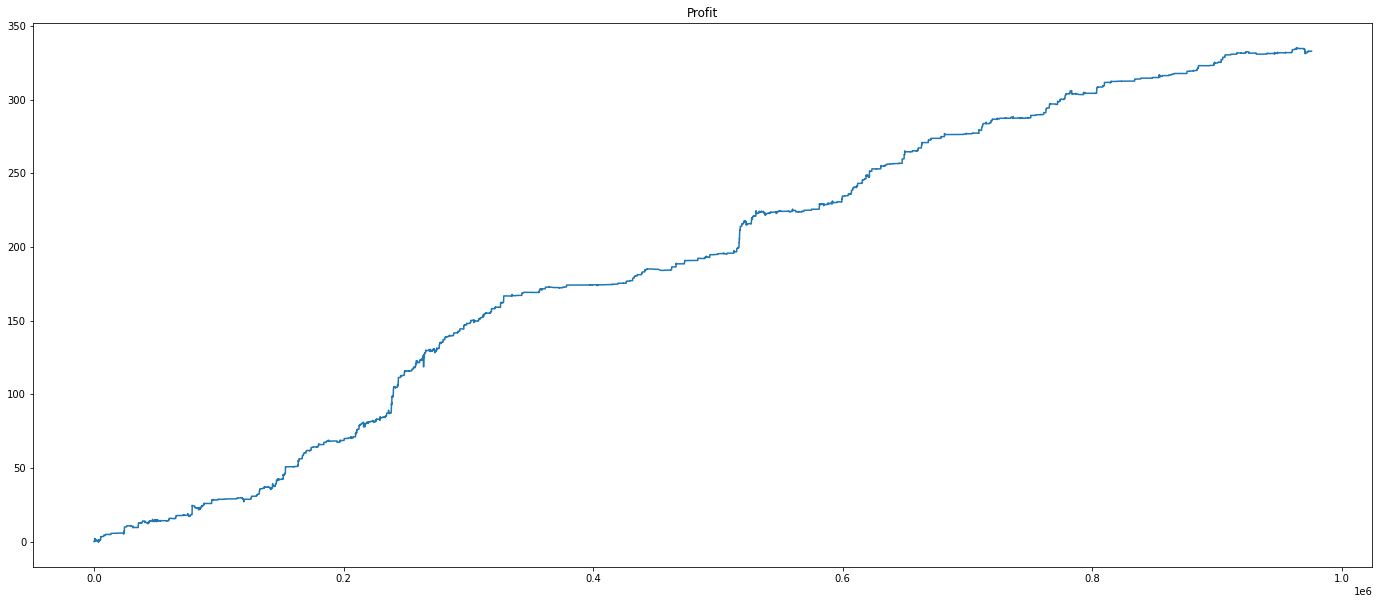

In [ ]:
fig = plt.figure(figsize=(24, 10))
plt.title('Profit')
plt.plot(range(len(profit)),profit)
plt.show()

### Implement delay function

In [ ]:
obi_long = 0.95
obi_short = -0.95
amount = 0.005
sec_hold = 10

ms_delay = [1,20,50,100,200,300,400,500,600,700,800,1000,2000,3000,4000,5000]

In [ ]:
d_portfolio = []
d_profit = []

In [ ]:
start_time = datetime.now()

nd = len(ms_delay)
n = len(obi)

for d in range(nd):
  port = [[]]
  prof = [0]

  de = ms_delay[d]

  obi2 = pd.DataFrame()
  obi2[['time','level_1','level_2','level_3','level_4','level_5']] = obi[['timestamp','level_1','level_2','level_3','level_4','level_5']]
  delay = obi2[['time']]
  delay['time'] = delay.index - timedelta(milliseconds=de)
  delay = pd.merge_asof(delay, obi2, on='time', direction="backward")
  delay.index = delay.time
  delay['time'] = delay.index + timedelta(milliseconds=de)

  for i in range(n):
    action = None
    if delay.level_5[i] >= obi_long:
      action = {'timestamp':price.index[i], 'exit_time':price.secceil_timestamp[i]+timedelta(seconds=sec_hold), 'price': price.ask_1_price[i], 'vol': amount}
    elif delay.level_5[i] <= obi_short:
      action = {'timestamp':price.index[i], 'exit_time':price.secceil_timestamp[i]+timedelta(seconds=sec_hold), 'price': price.bid_1_price[i], 'vol': -amount}
    
    l_portfolio = port[-1]
    l_profit = prof[-1]

    if action != None:
      if action['vol'] > 0:
        l_profit += action['vol'] * (price.bid_1_price[i] - price.ask_1_price[i])
      else:
        l_profit += (-action['vol']) * (price.bid_1_price[i] - price.ask_1_price[i])

    if len(l_portfolio) > 0:
      n_portfolio = []
      for e in l_portfolio:
        if e['exit_time'] >= price.secceil_timestamp[i]:
          if e['vol'] > 0:
            l_profit += e['vol'] * (price.bid_1_change[i])
          else:
            l_profit += e['vol'] * (price.ask_1_change[i])

        if e['exit_time'] == price.secceil_timestamp[i] and price.last_ticker[i]:
          pass
        elif e['exit_time'] < price.secceil_timestamp[i]:
          pass
        else:
          n_portfolio.append(e)

    else:
      n_portfolio = l_portfolio

    if action != None:
      n_portfolio.append(action)

    port.append(n_portfolio)
    prof.append(l_profit)

    if i % 10000 == 0:
      if i != 0:
        print(f'{i} - Total time: {(datetime.now()-start_time)/(i+n*d)*(n*nd)} - est. remaining {(datetime.now()-start_time)/i*(n-i+n*(nd-d-1))}')
        print(f'{prof[-1]}')
      else:
        print(f'Starting... {ms_delay[d]}')
      print('**************************************************************************************')
    elif i == n-1:
      print(f'Last one... {ms_delay[d]}')
      print(f'{prof[-1]}')
      print('**************************************************************************************')
  
  d_portfolio.append(port)
  d_profit.append(prof)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Starting... 1
**************************************************************************************
10000 - Total time: 8:19:17.585760 - est. remaining 8:18:58.395760
4.880892688373462
**************************************************************************************
20000 - Total time: 4:41:46.756320 - est. remaining 4:41:25.096320
5.719847303448334
**************************************************************************************
30000 - Total time: 4:46:43.366080 - est. remaining 4:46:10.306080
10.409970347237223
**************************************************************************************
40000 - Total time: 4:27:28.149120 - est. remaining 4:26:47.029120
13.88997193000359
**************************************************************************************
50000 - Total time: 4:52:11.197920 - est. remaining 4:51:15.047920
13.895309712021211
**************************************************************************************
60000 - Total time: 4:29:33.037440 - 

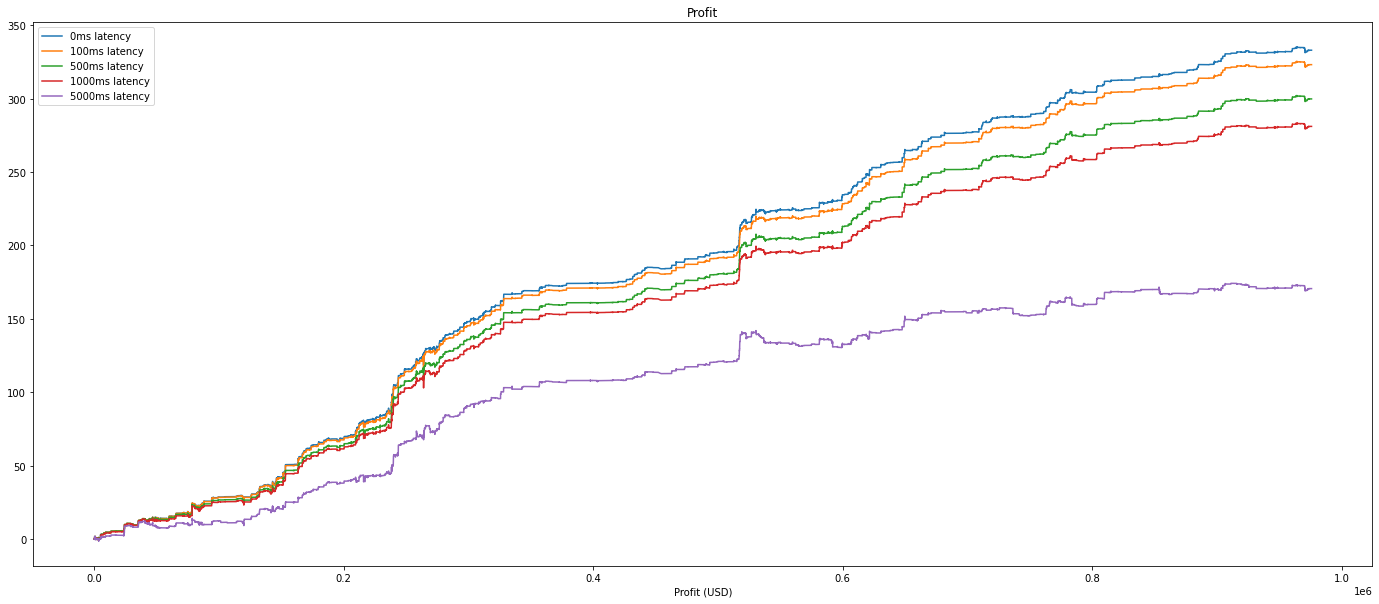

In [ ]:
fig = plt.figure(figsize=(24, 10))
plt.title('Profit')
plt.plot(range(len(profit)),profit, label='0ms latency')
plt.plot(range(len(profit)),d_profit[3], label=f'{ms_delay[3]}ms latency')
plt.plot(range(len(profit)),d_profit[7], label=f'{ms_delay[7]}ms latency')
plt.plot(range(len(profit)),d_profit[11], label=f'{ms_delay[11]}ms latency')
plt.plot(range(len(profit)),d_profit[-1], label=f'{ms_delay[-1]}ms latency')
plt.xlabel('Time')
plt.label('Profit (USD)')
plt.legend(loc=2)
plt.show()

In [ ]:
s_profit = []
for p in d_profit:
  s_profit.append((p[-1])/(d_profit[0][-1]))

In [ ]:
s_profit

[1.0,
 1.0030118999319124,
 1.003001711772314,
 0.9875318379033439,
 0.971235129569972,
 0.9500737743490271,
 0.9278925275099567,
 0.9162063938305322,
 0.9037098305821566,
 0.8833351359137117,
 0.8791527804451681,
 0.8590337036519904,
 0.752131141154538,
 0.6716676961693453,
 0.597051207915935,
 0.5215159369531248]

In [ ]:
s_profit

[1.0,
 1.0030118999319124,
 1.003001711772314,
 0.9875318379033439,
 0.971235129569972,
 0.9500737743490271,
 0.9278925275099567,
 0.9162063938305322,
 0.9037098305821566,
 0.8833351359137117,
 0.8791527804451681,
 0.8590337036519904,
 0.752131141154538,
 0.6716676961693453,
 0.597051207915935,
 0.5215159369531248]

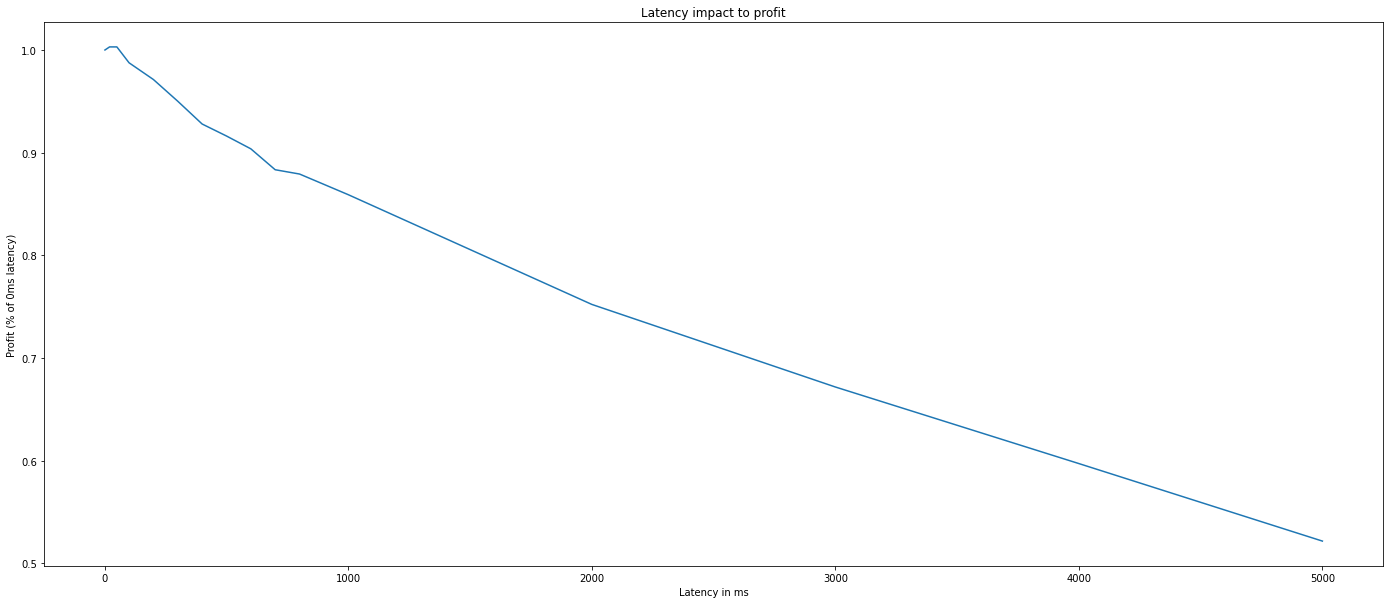

In [ ]:
fig = plt.figure(figsize=(24, 10))
plt.title('Latency impact to profit')
plt.plot(ms_delay, s_profit)
plt.xlabel('Latency in ms')
plt.ylabel('Profit (% of 0ms latency)')
plt.show()

In [ ]:
summary = pd.DataFrame(d_profit)

In [ ]:
summary = summary.T
summary.columns = ms_delay
summary.to_csv('/content/drive/MyDrive/WQU-Capstone-HFT/Dataset/Kaiko/L3_OrderBooks_Extract/Profit_compare.csv')
summary

,1,20,50,100,200,300,400,500,600,700,800,1000,2000,3000,4000,5000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975686,327.165097,328.150485,328.147152,323.085949,317.754235,310.830978,303.574049,299.750754,295.662314,288.996425,287.628105,281.045845,246.071058,219.746227,195.334316,170.621812
975687,327.165097,328.150485,328.147152,323.085949,317.754235,310.830978,303.574049,299.750754,295.662314,288.996425,287.628105,281.045845,246.071058,219.746227,195.334316,170.621812
975688,327.165097,328.150485,328.147152,323.085949,317.754235,310.830978,303.574049,299.750754,295.662314,288.996425,287.628105,281.045845,246.071058,219.746227,195.334316,170.621812
975689,327.165097,328.150485,328.147152,323.085949,317.754235,310.830978,303.574049,299.750754,295.662314,288.996425,287.628105,281.045845,246.071058,219.746227,195.334316,170.621812


### Shifting delay code test

In [ ]:
obi2 = pd.DataFrame()
obi2[['time','level_1','level_2','level_3','level_4','level_5']] = obi[['timestamp','level_1','level_2','level_3','level_4','level_5']]
delay = obi2[['time']]
delay['time'] = delay.index - timedelta(milliseconds=1000)
delay = pd.merge_asof(delay, obi2, on='time', direction="backward")
delay.index = delay.time
delay['time'] = delay.index + timedelta(milliseconds=1000)
delay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,time,level_1,level_2,level_3,level_4,level_5
time,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:00.022,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:01.801,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.373,2020-06-15 00:00:02.373,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.746,2020-06-15 00:00:02.746,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:03.348,2020-06-15 00:00:03.348,-0.611101,-0.525535,0.394482,NaN,NaN
...,...,...,...,...,...,...
2020-06-15 23:59:59.588,2020-06-15 23:59:59.588,0.996832,0.995924,0.519931,0.230482,0.229453
2020-06-15 23:59:59.658,2020-06-15 23:59:59.658,0.996832,0.995865,0.517212,0.227219,0.227728
2020-06-15 23:59:59.742,2020-06-15 23:59:59.742,0.996832,0.995865,0.517212,0.227219,0.227728


In [ ]:
obi

,timestamp,level_1,level_2,level_3,level_4,level_5
timestamp,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:00.022,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:01.801,-0.611101,-0.525535,0.394482,NaN,NaN
2020-06-15 00:00:02.373,2020-06-15 00:00:02.373,0.929913,0.920235,0.914788,NaN,NaN
2020-06-15 00:00:02.746,2020-06-15 00:00:02.746,0.929878,0.920196,0.914746,NaN,NaN
2020-06-15 00:00:03.348,2020-06-15 00:00:03.348,0.991499,0.922614,0.912779,0.914374,NaN
...,...,...,...,...,...,...
2020-06-15 23:59:59.588,2020-06-15 23:59:59.588,0.996832,0.995865,0.517212,0.227219,0.227728
2020-06-15 23:59:59.658,2020-06-15 23:59:59.658,0.192616,-0.117053,0.200616,0.235950,-0.019278
2020-06-15 23:59:59.742,2020-06-15 23:59:59.742,-0.946866,-0.190404,-0.114587,-0.057644,-0.053608
